#### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import Dataset

Dataset berikut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Dataset ini berisi label apakah para konsumen akan melakukan deposito atau tidak.

In [2]:
df_bank = pd.read_csv("bank-full.csv", sep=';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Melihat informasi dari dataset, baik dari jumlah data, jumlah kolom dan tipe data pada masing-masing kolom

In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Dikarenakan terdapat beberapa kolom yang tidak perlu digunakan, maka beberapa kolom disini akan dihapus.
1. Untuk kolom yang berhubungan dengan waktu disini dihapus dikarenakan dari informasi pada sumber dataset dikatakan bahwa harus dibuang jika tujuannya adalah untuk memiliki model tipe prediksi.
2. Untuk kolom education, contact, dan campaign disini tidak diperlukan karena biasanya tidak terlalu berpengaruh terhadap orang tersebut akan mendeposito

In [4]:
del_col = ['education', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
df_bank.drop(del_col, axis=1, inplace=True)
df_bank.head()

,age,job,marital,default,balance,housing,loan,poutcome,y
0,58,management,married,no,2143,yes,no,unknown,no
1,44,technician,single,no,29,yes,no,unknown,no
2,33,entrepreneur,married,no,2,yes,yes,unknown,no
3,47,blue-collar,married,no,1506,yes,no,unknown,no
4,33,unknown,single,no,1,no,no,unknown,no


Memvisualisasikan kolom tertentu untuk melihat persebaran datanya

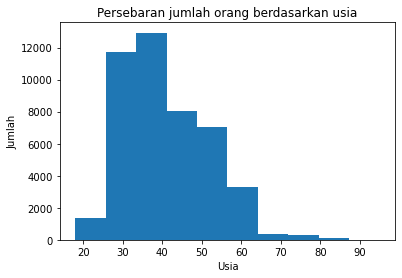

In [5]:
df_bank.age.plot(kind='hist');
plt.title('Persebaran jumlah orang berdasarkan usia');
plt.xlabel('Usia');
plt.ylabel('Jumlah');

Dari hasil visualisasi diketahui bahwa persebaran data dari orang-orang yang ada di dataset paling banyak berusia 40 tahun

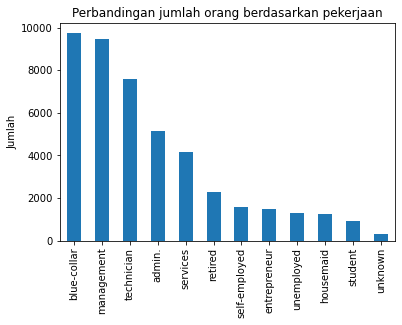

In [6]:
df_bank.job.value_counts().plot(kind='bar');
plt.title('Perbandingan jumlah orang berdasarkan pekerjaan');
plt.ylabel('Jumlah');

Dari hasil visualisasi diketahui bahwa persebaran data dari orang-orang yang ada di dataset paling banyak adalah bekerja sebagai buruh

Mengecek kembali informasi data untuk menentukan kolom manakah yang bertipe numerik dan kategorik

In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   job       45211 non-null  object
 2   marital   45211 non-null  object
 3   default   45211 non-null  object
 4   balance   45211 non-null  int64 
 5   housing   45211 non-null  object
 6   loan      45211 non-null  object
 7   poutcome  45211 non-null  object
 8   y         45211 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


Memisahkan antara data latih dan data uji

In [8]:
from sklearn.model_selection import train_test_split as tts
# pisahkan fitur & label
X = df_bank.drop('y', axis=1)
y = df_bank['y']

# split data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=46)

Memisahkan kolom bertipe numerik dan kategorik dikarenakan proses prepocessingnya berbeda

In [9]:
num_col = ['age', 'balance']
cat_col = ['job', 'marital', 'default', 'housing', 'loan', 'poutcome']

Melakukan scaling dengan MinMaxScaler agar lebih mudah mengilustrasikan

In [10]:
# scaling kolom numerik
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[num_col])

X_train_num = scaler.transform(X_train[num_col])
X_test_num = scaler.transform(X_test[num_col])

In [11]:
X_train_num, X_test_num

(array([[0.23376623, 0.12105751],
        [0.4025974 , 0.27725927],
        [0.22077922, 0.07372941],
        ...,
        [0.4025974 , 0.07526374],
        [0.50649351, 0.08968097],
        [0.11688312, 0.06878144]]),
 array([[0.23376623, 0.10900986],
        [0.12987013, 0.07584479],
        [0.33766234, 0.08467852],
        ...,
        [0.35064935, 0.07539084],
        [0.36363636, 0.10283624],
        [0.4025974 , 0.07086049]]))

Mengubah data yang bertipe kategori menjadi numerik dengan LabelEncoder

In [12]:
# encoding kolom kategorik
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_train_cat = []
X_test_cat = []

for i in cat_col:
    le.fit(X_train[i])
    arr_train = [le.transform(X_train[i])]
    arr_test = [le.transform(X_test[i])]

    # seleksi kondisi disini diperlukan karena fungsi concat tidak dapat dilakukan pada list atau array kosong
    if i == 'job':
        X_train_cat = arr_train
        X_test_cat = arr_test
    else:
        X_train_cat = np.concatenate((X_train_cat, arr_train))
        X_test_cat = np.concatenate((X_test_cat, arr_test))

Dikarenakan prosesnya dilakukan per kolom maka hasilnya perlu ditranspose terlebih dahulu

In [13]:
X_train_cat = X_train_cat.T
X_test_cat = X_test_cat.T

X_train_cat, X_test_cat

(array([[7, 2, 0, 1, 0, 3],
        [4, 1, 0, 0, 0, 3],
        [1, 1, 0, 1, 0, 3],
        ...,
        [4, 1, 0, 1, 0, 3],
        [1, 1, 0, 1, 0, 3],
        [1, 1, 0, 0, 1, 3]]),
 array([[ 7,  1,  0,  1,  1,  3],
        [ 1,  1,  0,  1,  0,  2],
        [ 1,  2,  0,  0,  1,  3],
        ...,
        [ 9,  1,  0,  0,  0,  3],
        [ 9,  1,  0,  0,  0,  3],
        [10,  0,  0,  1,  0,  3]]))

Menggabungkan kembali data numerik dan kategorik

In [14]:
X_train_all = np.column_stack((X_train_num, X_train_cat))
X_test_all = np.column_stack((X_test_num, X_test_cat))

X_train_all.shape, X_test_all.shape

((36168, 8), (9043, 8))

#### Machine Learning

##### Import Library

In [15]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

np.warnings.filterwarnings('ignore')

##### 1. Logistic Regression

In [16]:
# train model logreg
logreg = LogisticRegression()
logreg.fit(X_train_all, y_train)

# testing
y_pred = logreg.predict(X_test_all)

# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7960
         yes       0.00      0.00      0.00      1083

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



Dari hasil classification report dapat dilihat hasil dari precision, recall, f1-score untuk masing-masing ketika menjadi data positif. Lalu untuk bagian support adalah total data pada masing-masing label.

Lalu juga diketahui hasil akurasi dari model ini adalah 88%.

##### 2. K-Nearest Neighbor

In [17]:
# train model knn
knn = KNeighborsClassifier()
knn.fit(X_train_all, y_train)

# testing
y_pred = knn.predict(X_test_all)

# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.93      7960
         yes       0.49      0.18      0.26      1083

    accuracy                           0.88      9043
   macro avg       0.70      0.58      0.60      9043
weighted avg       0.85      0.88      0.85      9043



Dari hasil classification report dapat dilihat hasil dari precision, recall, f1-score untuk masing-masing ketika menjadi data positif. Lalu untuk bagian support adalah total data pada masing-masing label.

Lalu juga diketahui hasil akurasi dari model ini adalah 88%.

##### 3. Support Vector Machine

In [18]:
# train model svm
svm = LinearSVC()
svm.fit(X_train_all, y_train)

# testing
y_pred = svm.predict(X_test_all)

# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7960
         yes       0.00      0.00      0.00      1083

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



Dari hasil classification report dapat dilihat hasil dari precision, recall, f1-score untuk masing-masing ketika menjadi data positif. Lalu untuk bagian support adalah total data pada masing-masing label.

Lalu juga diketahui hasil akurasi dari model ini adalah 88%.

##### 4. Decision Tree

In [19]:
# train model decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train_all, y_train)

# testing
y_pred = tree.predict(X_test_all)

# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.89      0.89      7960
         yes       0.23      0.25      0.24      1083

    accuracy                           0.81      9043
   macro avg       0.56      0.57      0.56      9043
weighted avg       0.82      0.81      0.81      9043



Dari hasil classification report dapat dilihat hasil dari precision, recall, f1-score untuk masing-masing ketika menjadi data positif. Lalu untuk bagian support adalah total data pada masing-masing label.

Lalu juga diketahui hasil akurasi dari model ini adalah 81%.

##### 5. Random Forest

In [20]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train_all, y_train)

# testing
y_pred = rf.predict(X_test_all)

# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.96      0.93      7960
         yes       0.43      0.21      0.28      1083

    accuracy                           0.87      9043
   macro avg       0.67      0.59      0.61      9043
weighted avg       0.84      0.87      0.85      9043



Dari hasil classification report dapat dilihat hasil dari precision, recall, f1-score untuk masing-masing ketika menjadi data positif. Lalu untuk bagian support adalah total data pada masing-masing label.

Lalu juga diketahui hasil akurasi dari model ini adalah 87%.

##### 6. Naive Bayes

In [21]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train_all, y_train)

# testing
y_pred = nb.predict(X_test_all)

# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.89      0.97      0.93      7960
         yes       0.30      0.10      0.15      1083

    accuracy                           0.86      9043
   macro avg       0.60      0.54      0.54      9043
weighted avg       0.82      0.86      0.83      9043



Dari hasil classification report dapat dilihat hasil dari precision, recall, f1-score untuk masing-masing ketika menjadi data positif. Lalu untuk bagian support adalah total data pada masing-masing label.

Lalu juga diketahui hasil akurasi dari model ini adalah 86%.

Dari seluruh model yang digunakan yang memperoleh akurasi tertinggi dalam memproses dataset sebelumnya adalah model Logistic Regression, K-Nearest Neighbor, dan Support Vector Machine dengan tingkat akurasi 88%